# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [5]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [191]:
def q1():
    altura = get_sample(athletes, col_name = 'height', n=3000, seed = 42)
    return sct.shapiro(altura)[1]>0.05
q1()

False

### Para refletir:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

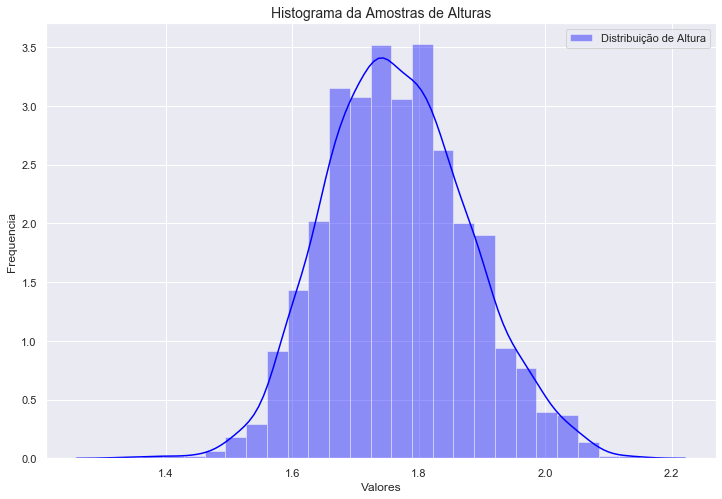

In [183]:
altura = get_sample(athletes, col_name = 'height', n=3000, seed = 42)
f, ax = plt.subplots(1,1)
sns.distplot(altura, bins=25, label='Distribuição de Altura', color='blue')
ax.set_title('Histograma da Amostras de Alturas', fontsize=14)
ax.set(xlabel='Valores', ylabel='Frequencia')
ax.legend()

Pode-se ver pelo gráfico que os dados da coluna `altura` não apresentam uma forma semelhante a uma curva normal. Isso mostra que o resultado obtido estão condizentes.

* Plote o qq-plot para essa variável e a analise.

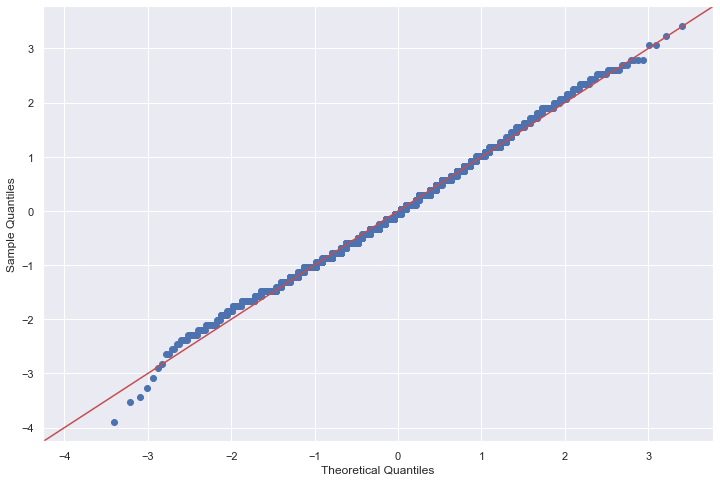

In [188]:
sm.qqplot(altura, fit=True, line="45");

Pode-se observar que a os dados da coluna `altura` não se alinham com a curva normal no intervalo das caudas.

* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

In [189]:
sct.shapiro(altura)[1]

5.681722541339695e-07

Caso o valor de significância fosse menor do que 5.681722541339695e-07 o resultado do exercício seria diferente. 

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [192]:
def q2(): 
    altura = get_sample(athletes, col_name = 'height', n=3000, seed = 42)
    return bool(sct.jarque_bera(altura)[1]>0.05)
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

Assim como na questão passada tivemos um resultado `False` para o teste de normalidade de Jarque-Bera, vendo o histograma e o qq-plot apresentados na questão anterior pode-se concluir que o resultado está de acordo com o esperado. 

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [193]:
def q3():
    pesos = get_sample(athletes, col_name = 'weight', n=3000, seed = 42)
    return bool(sct.normaltest(pesos)[1]>0.05)
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

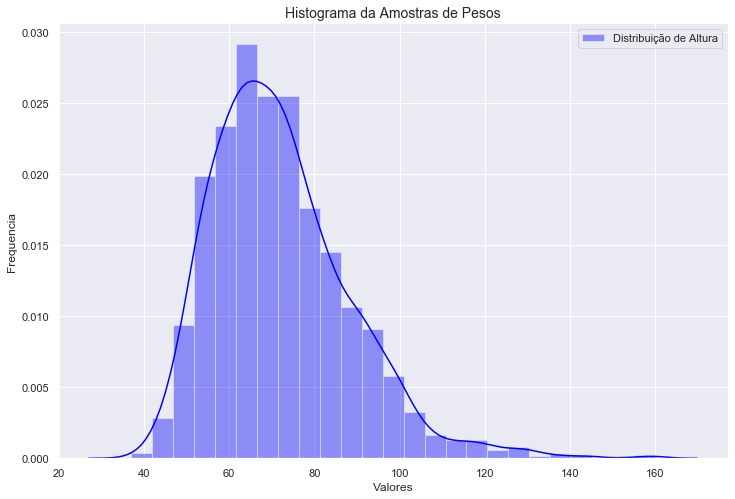

In [190]:
pesos = get_sample(athletes, col_name = 'weight', n=3000, seed = 42)
f, ax = plt.subplots(1,1)
sns.distplot(pesos, bins=25, label='Distribuição de Altura', color='blue')
ax.set_title('Histograma da Amostras de Pesos', fontsize=14)
ax.set(xlabel='Valores', ylabel='Frequencia')
ax.legend()

Pelo histograma podemos que a curva apresenta uma assimetria positiva, o que não é o resultado esperado para uma distribuição normal. 

* Um _box plot_ também poderia ajudar a entender a resposta.

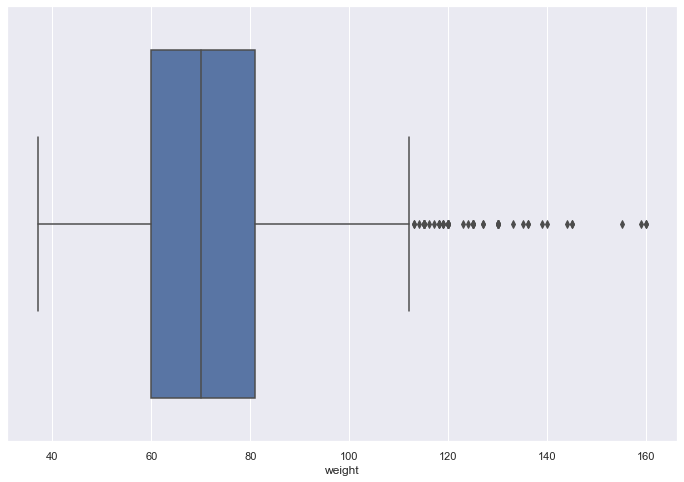

In [199]:
sns.boxplot(pesos)

Vemos que alguns dos resultados são outliers o que tira justifica a assimetria verificada anteriormente

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [200]:
def q4():
    pesos = get_sample(athletes, col_name = 'weight', n=3000, seed = 42)
    pesos_log = np.log(pesos)
    return bool(sct.normaltest(pesos_log)[1]>0.05)
q4()

False

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [178]:
altura_brasil = athletes[athletes['nationality'] == 'BRA']['height']
altura_canada = athletes[athletes['nationality'] == 'CAN']['height']
altura_usa = athletes[athletes['nationality'] == 'USA']['height']

In [201]:
def q5():
    return bool(sct.ttest_ind(altura_usa,altura_brasil,equal_var=False, nan_policy ='omit')[1]>0.05)
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [202]:
def q6():
    return bool(sct.ttest_ind(altura_canada,altura_brasil,equal_var=False, nan_policy ='omit')[1]>0.05)
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [203]:
def q7():
    return float(np.round(sct.ttest_ind(altura_usa,altura_canada,equal_var=False,nan_policy ='omit')[1],8))
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

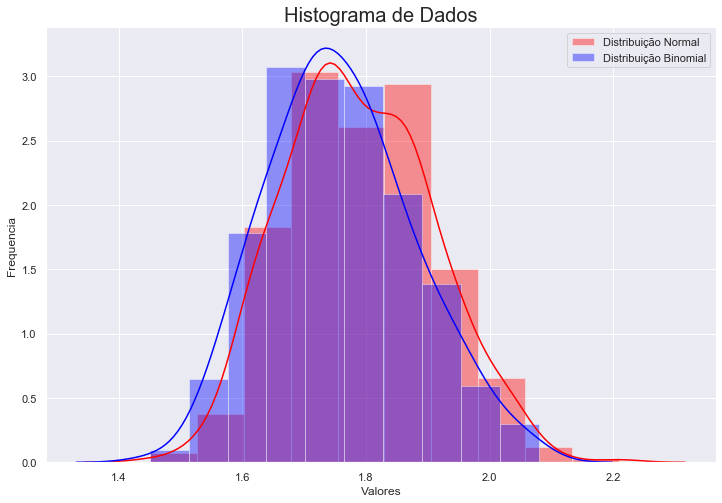

In [204]:
f, ax = plt.subplots(1,1)
sns.distplot(altura_usa, bins=10, label='Distribuição Normal', color='red')
sns.distplot(altura_canada, bins=10, label='Distribuição Binomial', color='blue')
ax.set_title('Histograma de Dados', fontsize=20)
ax.set(xlabel='Valores', ylabel='Frequencia')
#ax.set_xlim([0, 1])
ax.legend()

Observando os gráficos dos histogramas podemos verificar que a distribuição das variáveis `altura_usa` e `altura_canada` não são as mesmas. Portanto o resultado do p-valor faz sentido. 
Esse resultado mostra que a hipótese de que as duas amostras `altura_usa` e `altura_canada` vêm de distribuições de mesma média é falsa. Entretanto, não é possível obter qual é a distribuição de cada uma das variáveis. 
   